In [1]:
!pip install ultralytics==8.3.19
!pip install supervision[assets]==0.24.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 15.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found

In [8]:
import os
import numpy as np
import supervision as sv
from ultralytics import YOLO
import ultralytics
from IPython import display

display.clear_output()

ultralytics.checks()

HOME = os.getcwd()
print(HOME)

Ultralytics 8.3.19 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6362.0/8062.4 GB disk)
/kaggle/working


In [17]:
# !wget "https://www.youtube.com/watch?v=BLc8s-_tsiQ&list=PLJKyZ_NuOhJQzif2-6-Kq9OiOj_UjJWvi&index=7" -O video.mp4

--2025-05-28 17:16:46--  https://www.youtube.com/watch?v=BLc8s-_tsiQ&list=PLJKyZ_NuOhJQzif2-6-Kq9OiOj_UjJWvi&index=7
Resolving www.youtube.com (www.youtube.com)... 172.217.204.136, 74.125.26.91, 172.217.203.91, ...
Connecting to www.youtube.com (www.youtube.com)|172.217.204.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘video.mp4’

video.mp4               [  <=>               ] 935.64K  1.79MB/s    in 0.5s    

2025-05-28 17:16:46 (1.79 MB/s) - ‘video.mp4’ saved [958097]



In [35]:
SOURCE_VIDEO_PATH = '/kaggle/input/people-walking-resolution/people-walking.mp4'

## YOLOv8

In [36]:
model = YOLO('yolov8s.pt')

In [37]:
CLASS_NAMES_DICT = model.model.names
CLASS_NAMES_DICT

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [38]:
# SELECTED_CLASS_NAMES = ['car', 'truck', 'bus', 'motorcycle']
SELECTED_CLASS_NAMES = ['person']

In [39]:
SELECTED_CLASS_IDS = [{value: key for key, value in CLASS_NAMES_DICT.items()}[class_name] for class_name in SELECTED_CLASS_NAMES]
SELECTED_CLASS_IDS

[0]

In [42]:
# Generate frames from the input video file
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Create an instance of BoxAnnotator for drawing bounding boxes
box_annotator = sv.BoxAnnotator(thickness=2)

# Create an instance of LabelAnnotator for displaying labels on detections
label_annotator = sv.LabelAnnotator(
    text_thickness=1,
    text_scale=1,
    text_color=sv.Color.BLACK
)

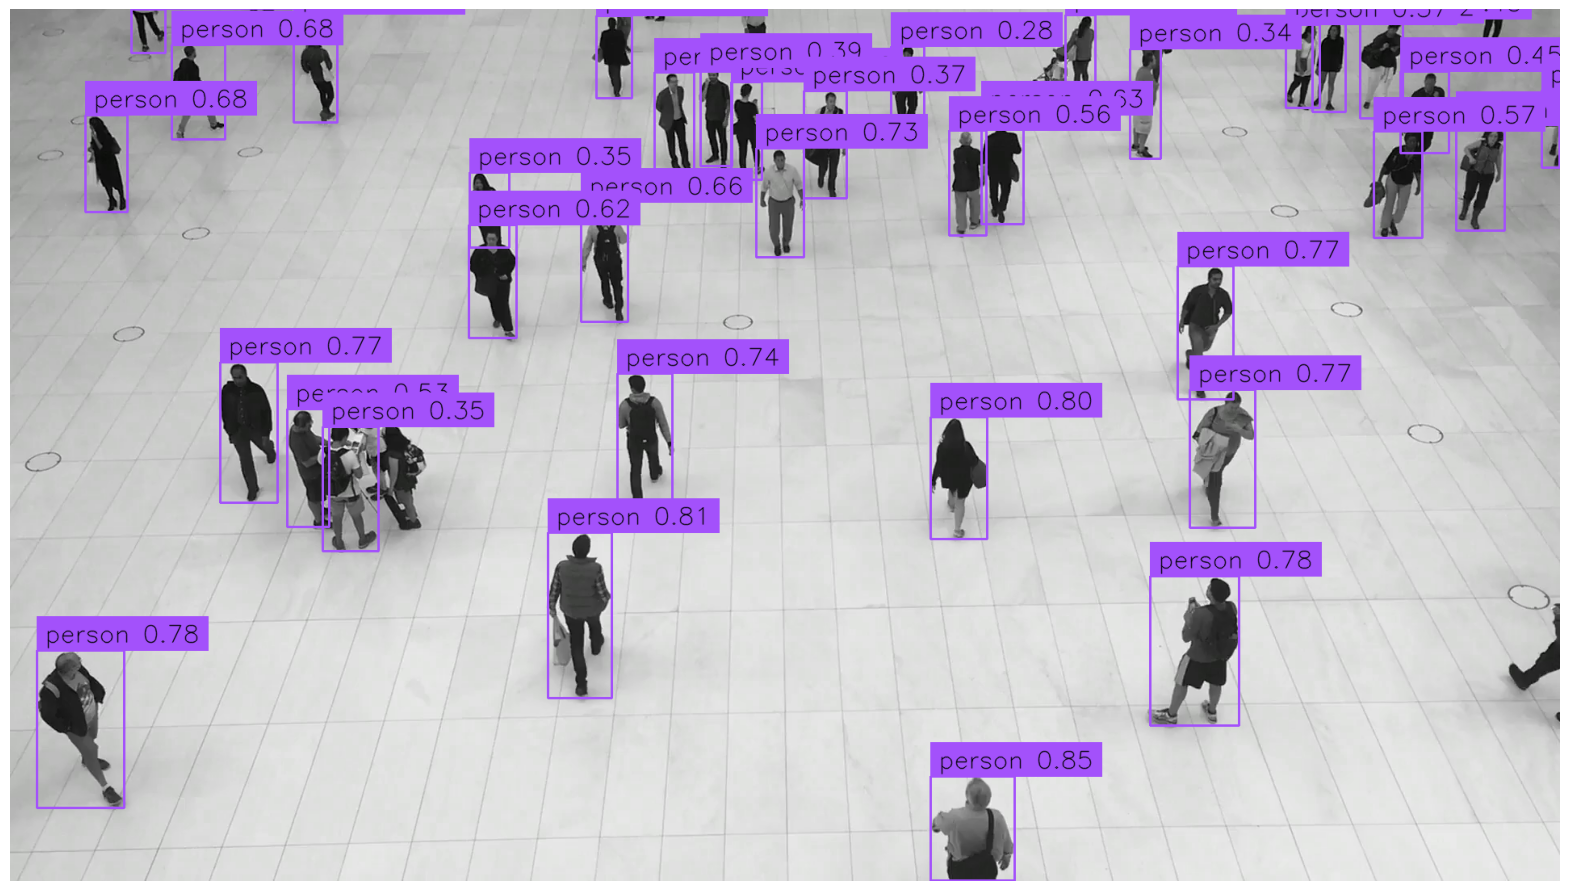

In [43]:
iterator = iter(generator)

# Retrieve the first frame from the video
frame = next(iterator)

# Run the YOLO model on the frame to detect objects
results = model(frame, verbose=False)[0]

# Convert YOLO detection results to a Supervision Detections object
detections = sv.Detections.from_ultralytics(results)

# Filter detections to keep only the selected class IDs (car, motorcycle, bus, truck)
detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

# Generate labels for detected objects in the format "class_name confidence"
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# Create a copy of the frame to apply annotations
annotated_frame = frame.copy()

# Draw bounding boxes on the detected objects
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections
)

# Draw labels on the detected objects
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels
)

# Display the annotated frame with bounding boxes and labels
sv.plot_image(annotated_frame, (20, 20))

## ByteTrack

In [59]:
# Define the start and end point for the line used in zone tracking
LINE_START = sv.Point(0, 540)
LINE_END = sv.Point(1920, 540)  # Assuming video width is 3840

In [60]:
# Define the output video path where results will be saved
TARGET_VIDEO_PATH = f"{HOME}/result_BYTEtracker.mp4"

In [61]:
# Get video metadata from the source video
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# Create a frame generator from the video
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

In [62]:
video_info

VideoInfo(width=1920, height=1080, fps=25, total_frames=341)

In [63]:
# Initialize the ByteTrack tracker with custom parameters
byte_tracker = sv.ByteTrack(
    track_activation_threshold=0.25,  # Confidence threshold to activate a new track
    frame_rate=video_info.fps,        # Frame rate of the video
    minimum_consecutive_frames=3      # Minimum number of frames an object must appear to be tracked
)

# Reset the tracker to start fresh
byte_tracker.reset()

In [64]:
# Define a LineZone for tracking objects crossing a specified line
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

In [65]:
# Initialize different annotators for visualization
box_annotator = sv.BoxAnnotator(thickness=2)  # Bounding box annotator

label_annotator = sv.LabelAnnotator(
    text_thickness=1,
    text_scale=1,
    text_color=sv.Color.BLACK
)  # Label annotator

trace_annotator = sv.TraceAnnotator(
    thickness=2,
    trace_length=50
)  # Draws object traces

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=2,
    text_thickness=1,
    text_scale=2
)  # Annotates the line zone

In [66]:
def callback(frame: np.ndarray, index: int) -> np.ndarray:
    # Run YOLO model on the current frame to detect objects
    results = model(frame, verbose=False)[0]

    # Convert YOLO detections into Supervision Detections format
    detections = sv.Detections.from_ultralytics(results)

    # Filter detections to include only selected classes (cars, motorcycles, buses, trucks)
    detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

    # Update the object tracker with new detections
    detections = byte_tracker.update_with_detections(detections)

    # Generate labels containing tracker ID, class name, and confidence score
    labels = [
        f"#{tracker_id} {model.model.names[class_id]}"
        for confidence, class_id, tracker_id in zip(
            detections.confidence, detections.class_id, detections.tracker_id
        )
    ]

    # Copy the frame to annotate it
    annotated_frame = frame.copy()

    # Annotate object traces
    annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=detections)

    # Annotate bounding boxes around detected objects
    annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)

    # Annotate labels with object ID and confidence
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

    # Trigger the line zone when objects cross it
    line_zone.trigger(detections)

    # Return the frame with line zone annotations applied
    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

In [67]:
sv.process_video(
    source_path=SOURCE_VIDEO_PATH,   # Path to input video
    target_path=TARGET_VIDEO_PATH,   # Path to save output video
    callback=callback                # Function to process each frame
)